In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
X = df.drop('charges', axis = 1)
y = df['charges']

In [4]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [5]:
X.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [6]:
# No nulls in dataset

# Analysis of target variable - Charges

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

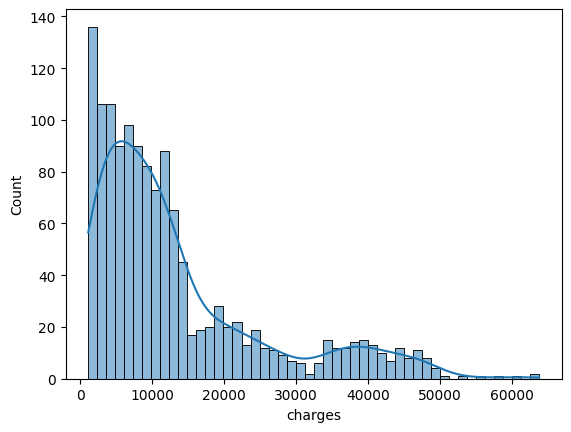

In [8]:
sns.histplot(y, bins = 50, kde = True)
plt.show()

* Insight: It is a right skewed dependent variable

# Check target variable outliers

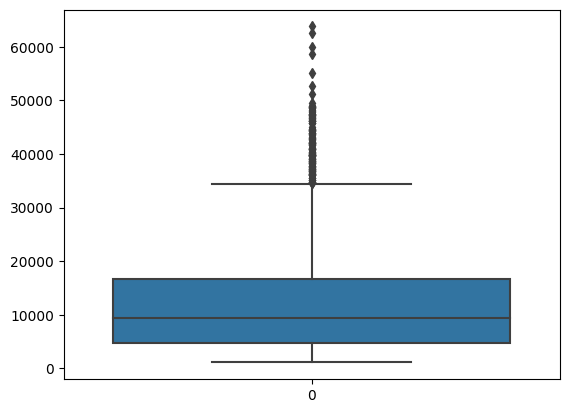

In [9]:
sns.boxplot(y)
plt.show()

* Insight : Target has lot of outliers

In [10]:
# we will consider taking log1p of target to remove skewness
# Can clip the extreme outliers also

# Categorical Features Encoding

In [11]:
X['sex'] = X['sex'].replace('female', 0)
X['sex'] = X['sex'].replace('male', 1)

In [12]:
X['smoker'] = X['smoker'].replace('yes', 1)
X['smoker'] = X['smoker'].replace('no', 0)

In [13]:
# One hot encoding for "region" column

X = pd.get_dummies(X, columns = ['region'], drop_first = True)
X[['region_northwest','region_southeast','region_southwest']] = X[['region_northwest','region_southeast','region_southwest']].astype(int)


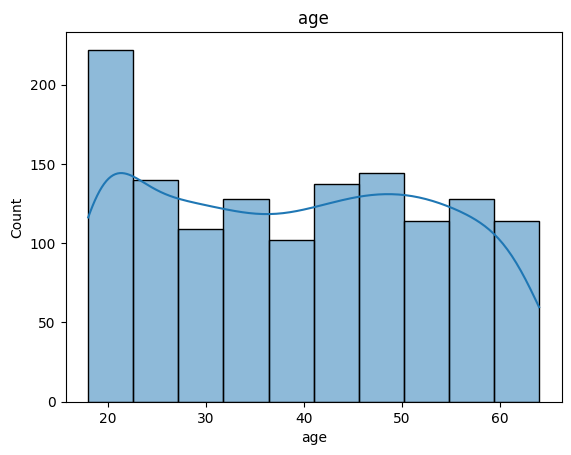

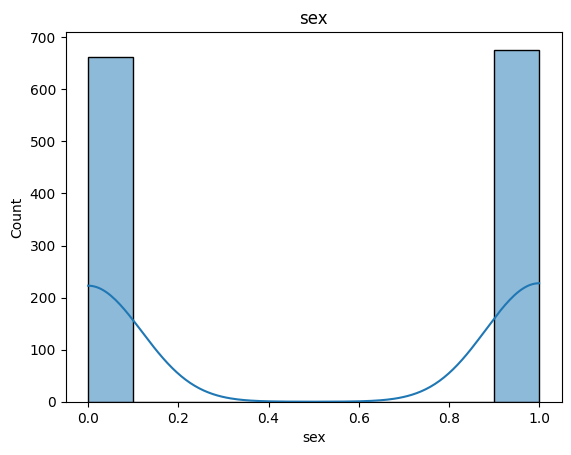

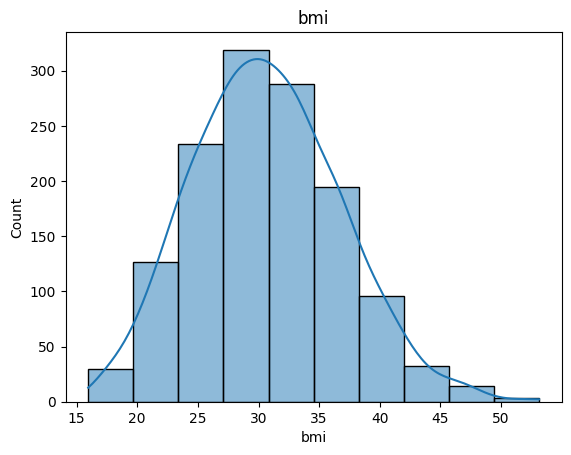

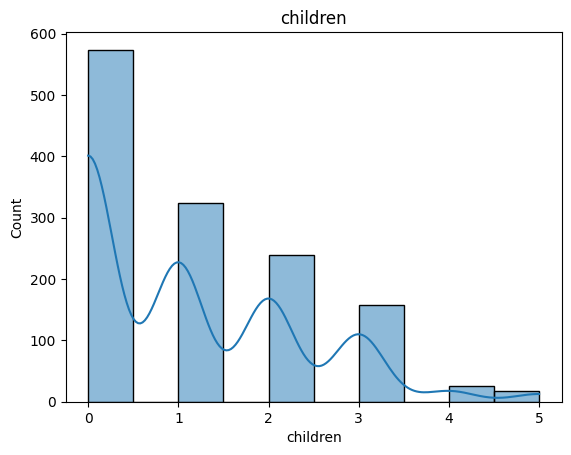

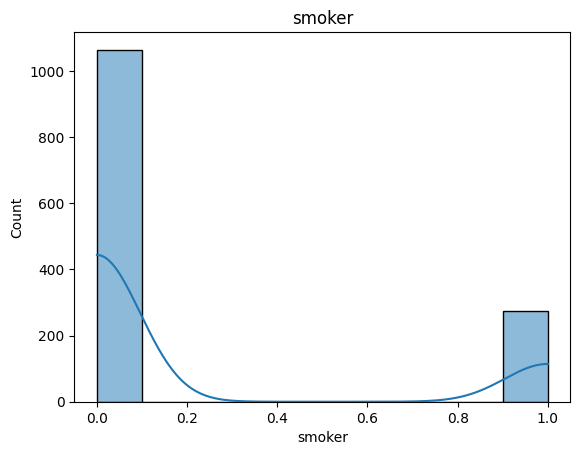

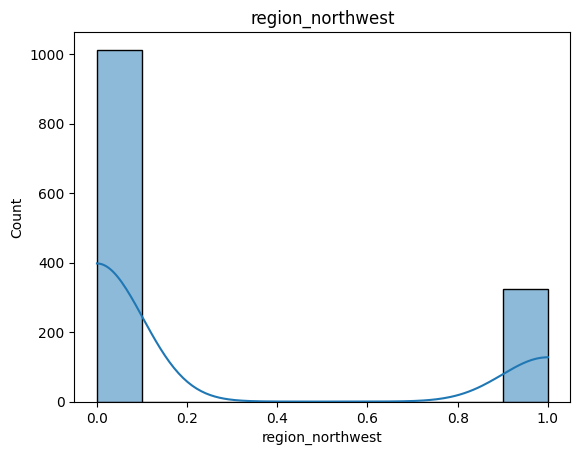

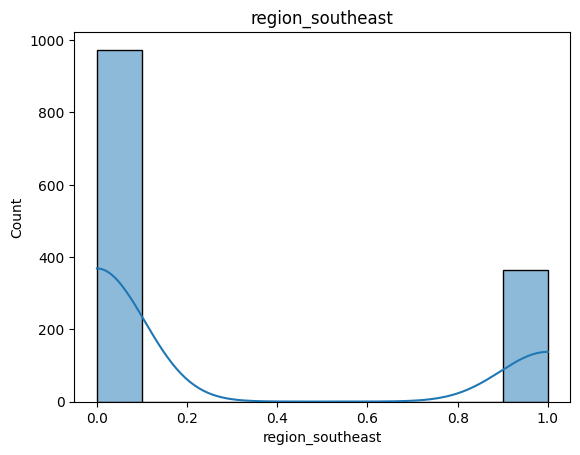

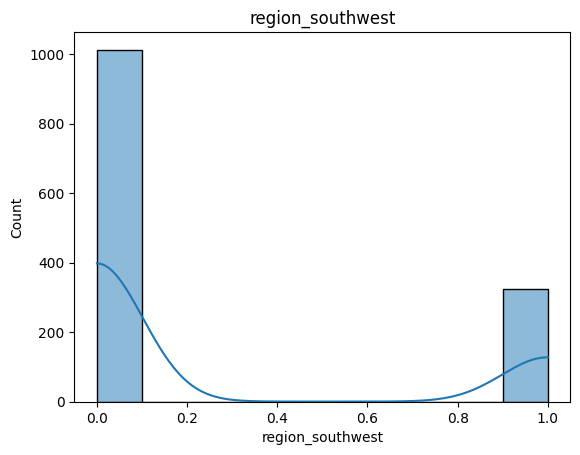

In [14]:
# Check independent variable distribution
for col in X.columns:
    sns.histplot(X[col], bins = 10, kde = True)
    plt.title(col)
    plt.show()

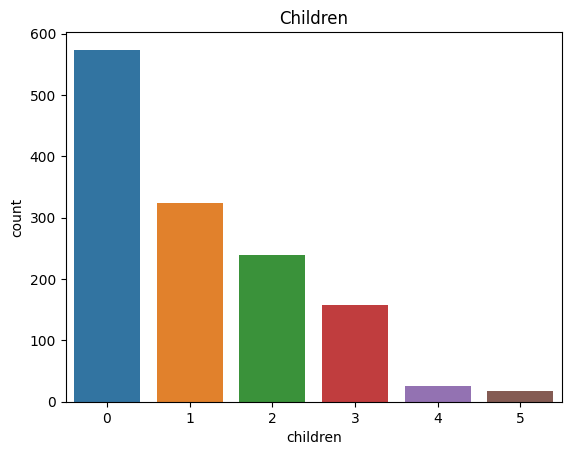

In [15]:
# For discrete variable - Number of children
sns.countplot(x = 'children', data = X)
plt.title('Children')
plt.show()

* Insights:
1. BMI is normally diistributed
2. Age is almost uniofrmly distrubted, flattish
3. Most of the people are not having children, might be the ones who are not married yet, representing youth

In [16]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [17]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Random Forest Regression

In [18]:
# Import Necessary libraries

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

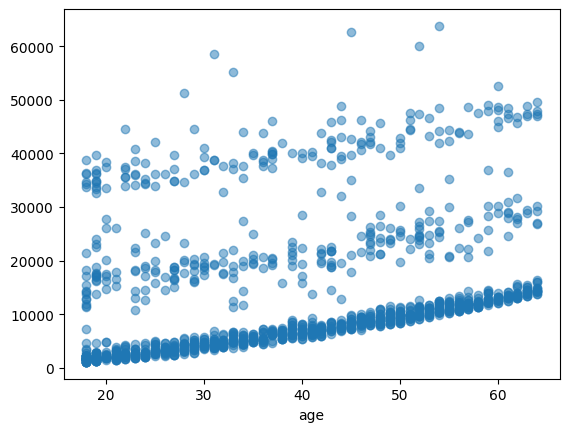

In [ ]:
plotcol = ['age', 'bmi']
for col in plotcol:
    plt.scatter(df[col], df['charges'], alpha = 0.5)
    plt.xlabel(col)
    plt.show()

In [ ]:
# insights - as BMI increases, charges also almost increases
# age ve charges shows three distinct bands, which usually  means age is also affected by other parameter like smoking, 
# so for people who are smoker and also aged , for them charges will be very high

In [ ]:
rfregressor = RandomForestRegressor(random_state = 42)

In [ ]:
param_dist = {'n_estimators' : [100, 400],
             'max_depth' : [3,5,7]
}

In [24]:
random_search = RandomizedSearchCV(rfregressor, param_distributions = param_dist, cv  = 3)

random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 400]})

In [25]:
y_pred = random_search.predict(X_test)

In [26]:
print('r2 score for random forest is ', r2_score(y_pred, y_test))
print('Root Mean Squared Error  for Random Forest is ', mean_squared_error(y_test, y_pred, squared  = False))

r2 score for random forest is  0.8598474633008311
Root Mean Squared Error  for Random Forest is  4419.129396934369


In [27]:
# XGB Regressor

In [28]:
xgboostregressor = XGBRegressor(random_state = 42)

In [29]:
param_dist = {'n_estimators' : [100, 400],
             'max_depth' : [3,5,7],
              'learning_rate' : [0.01, 0.3, 10]
}

In [30]:
random_search = RandomizedSearchCV(xgboostregressor, param_distributions = param_dist, cv  = 3)

random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...e,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   param_distributions={'learning_rate': [0.01, 0.3, 10],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 400]})

In [31]:
y_pred = random_search.predict(X_test)

In [32]:
print('r2 score for XGBoost Regressor is ', r2_score(y_pred, y_test))
print('Root Mean Squared Error  for XGBoost Regressor is ', mean_squared_error(y_test, y_pred, squared  = False))

r2 score for XGBoost Regressor is  0.8574677305957842
Root Mean Squared Error  for XGBoost Regressor is  4278.341069767198


In [33]:
# SECOND APPROACH

In [34]:
# Take Log of target - charges  - as it is heavily right skewed

In [35]:
y.describe()  # Huge difference in 75 percentile and max also confirms skewness, difference in mean and median
# also suggest outliers

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [36]:
y_new = np.log1p(y)

In [41]:
# train_test_split
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size = 0.2, random_state = 42)

In [42]:
xgboostregressor = XGBRegressor(random_state = 42)

In [43]:
param_dist = {'n_estimators' : [100, 400],
             'max_depth' : [3,5,7],
              'learning_rate' : [0.01, 0.3, 10]
}

In [44]:
random_search = RandomizedSearchCV(xgboostregressor, param_distributions = param_dist, cv  = 3)

random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...e,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   param_distributions={'learning_rate': [0.01, 0.3, 10],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 400]})

In [46]:
y_pred_log = random_search.predict(X_test)

In [47]:
# Inverse transform (back to original scale)
y_pred = np.expm1(y_pred_log)

In [49]:
y_pred

array([ 9590.93  ,  5915.3633, 25028.287 ,  9461.513 , 33301.453 ,
        5996.006 ,  2327.938 , 13727.16  ,  4013.2717, 10759.508 ,
       17072.146 ,  7635.3047,  4847.7856, 42286.203 , 45065.168 ,
       42286.203 , 10721.697 , 42237.836 ,  9171.956 , 23338.074 ,
        5291.612 ,  8752.813 ,  1785.2982,  2567.1465, 11140.348 ,
       12062.408 , 13590.78  ,  6018.3984, 10624.067 ,  1912.8302,
        7464.1743, 12062.408 ,  2431.6658,  5918.2134,  3968.2524,
        9230.518 ,  2816.0652,  8557.301 , 23621.342 , 37790.08  ,
        4180.406 ,  2868.0376, 11966.293 , 13331.324 ,  6675.8223,
       13858.762 ,  4780.3623,  5422.882 , 40983.676 ,  5670.736 ,
       13694.573 ,  2435.5244,  7363.775 ,  1943.4008, 11880.175 ,
       11127.042 ,  3833.458 , 38675.863 , 12105.0625, 11788.254 ,
       13590.78  ,  5788.8423, 14416.068 ,  7739.7446, 11343.277 ,
        5023.098 , 17732.01  , 11958.192 ,  4630.821 ,  2117.0574,
        6664.733 ,  9590.93  , 10299.191 ,  7553.785 ,  8613.2

In [51]:
y_test_new =  np.expm1(y_test)

In [53]:
print('r2 score for XGBoost Regressor is ', r2_score(y_pred, y_test_new))
print('Root Mean Squared Error  for XGBoost Regressor is ', mean_squared_error(y_test_new, y_pred, squared  = False))

r2 score for XGBoost Regressor is  0.8463942713774297
Root Mean Squared Error  for XGBoost Regressor is  4355.500683748616


In [ ]:
# Log transform is not always guaranteed to improve — especially with tree ensembles.
# Tree ensembles can internally handle skewed data, r2 remains same
# XGBoost is strong enough to model skewed targets directly. That’s why raw target already gave good performance.

In [ ]:
# THIRD APPROACH - FEATURE ENGINEERING
# Cost seems to be affected byt not just age , bt other features too like gender, smoker vs non-smoker

# Domain-driven interactions
* bmi* smoker, age* smoker, age squared, bmi squared
* All the above makes it more obvious for the model to understand the variance of data
* BMI alone is less important the bmi * smoker as far as hospital charges are concerned, as it related to 
* potential long hospital stays, same goes for age * smoker
* age squared, bmi squared also gives more ficus to these fetaures as with increasing age or bmi, charges might not
* just increase linearly and could have synergystic effect

In [57]:
X['age_non_linear'] = X['age'] * X['age']

In [59]:
X['bmi_non_linear'] = X['bmi'] * X['bmi']

In [60]:
X['bmi_smoker'] = X['bmi'] * X['smoker']
X['age_smoker'] = X['age'] * X['smoker']

In [77]:
# XGboost regressot + L1 regularization

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [79]:
L1xgboostregressor = XGBRegressor(random_state = 42)

In [80]:
param_dist = {'n_estimators' : [100, 400],
             'max_depth' : [3,5,7],
            'reg_alpha' : [0, 0.1, 1, 5, 10],
            'learning_rate' : [0.05, 0.1, 10]
}

In [81]:
random_search = RandomizedSearchCV(L1xgboostregressor, param_distributions = param_dist, cv  = 3)

random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   param_distributions={'learning_rate': [0.05, 0.1, 10],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 400],
                                        'reg_alpha': [0, 0.1, 1, 5, 10]})

In [82]:
y_pred = random_search.predict(X_test)

In [83]:
print('r2 score for XGBoost Regressor with L1 regularization is ', r2_score(y_pred, y_test))
print('Root Mean Squared Error  for XGBoost Regressor with L1 regularization is ', mean_squared_error(y_test, y_pred, squared  = False))

r2 score for XGBoost Regressor with L1 regularization is  0.8683271567940092
Root Mean Squared Error  for XGBoost Regressor with L1 regularization is  4284.33938975227


# Insights:

* R² high (~0.87) → good explanatory power.

* RMSE in thousands → still large, but expected since hospital costs are naturally high variance.

* RMSE reduction compared to earlier results shows better real-world prediction quality.

In [ ]:
# Fourth Approach - Binning and Target Encoding

In [ ]:
* Binning  - Age, BMI
* Target Encoding for region, replace region with its mean cost in training data

In [ ]:
# Age - binning and encoding

In [85]:
X['age_bins'] = pd.cut(X['age'], bins = [18, 29, 44, 54, 64], labels = ['18-29', '30-44', '45-54', '55-64'], include_lowest  = True)

In [87]:
mapping = {'18-29': 0, '30-44': 1, '45-54': 2, '55-64': 3}
X['age_bin_encoded'] = X['age_bins'].map(mapping)
X.drop(columns = 'age_bins', axis = 1, inplace = True)

In [ ]:
# BMI - binning and encoding

In [88]:
X['bmi_bins'] = pd.cut(X['bmi'], bins = [15, 25, 35, 45, 55], labels = ['15-25', '26-35', '36-45', '46-55'], include_lowest  = True)

In [89]:
mapping = {'15-25': 0, '26-35': 1, '36-45': 2, '46-55': 3}
X['bmi_bin_encoded'] = X['bmi_bins'].map(mapping)
X.drop(columns = 'bmi_bins', axis = 1, inplace = True)

In [ ]:
# Target Encoding for region, replace region with its mean cost in training data

In [98]:
X['region']  = df['region']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [100]:
train_df = X_train.copy()
train_df['cost'] = y_train

region_mean = train_df.groupby('region')['cost'].mean()

X_train['region_TE'] = X_train['region'].map(region_mean)
X_test['region_TE'] = X_test['region'].map(region_mean)

global_mean = y_train.mean()
X_test['region_TE'].fillna(global_mean, inplace = True)

X_train.drop(columns = ['region', 'region_northwest',
       'region_southeast', 'region_southwest'], inplace = True)
X_test.drop(columns = ['region', 'region_northwest',
       'region_southeast', 'region_southwest'], inplace = True)

In [109]:
L1xgboostregressor = XGBRegressor(random_state = 42, enable_categorical = True)

# enable_categorical = True, as after biing we gave categories like 0,1,2,3

In [110]:
param_dist = {'n_estimators' : [100, 400],
             'max_depth' : [3,5,7],
            'reg_alpha' : [0, 0.1, 1, 5, 10],
            'learning_rate' : [0.05, 0.1, 10]
}

In [111]:
random_search = RandomizedSearchCV(L1xgboostregressor, param_distributions = param_dist, cv  = 3)

random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=True,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=N...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   param_distributions={'learning_rate': [0.05, 0.1, 10],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 400],
                                        'reg_alpha': [0, 0.1, 1, 5, 10]})

In [112]:
y_pred = random_search.predict(X_test)

In [113]:
print('r2 score for XGBoost Regressor with L1 regularization + Binning + Target encoding is ', r2_score(y_pred, y_test))
print('Root Mean Squared Error  for XGBoost Regressor with L1 regularization  + Binning + Target encoding is ', mean_squared_error(y_test, y_pred, squared  = False))

r2 score for XGBoost Regressor with L1 regularization + Binning + Target encoding is  0.8612331729262996
Root Mean Squared Error  for XGBoost Regressor with L1 regularization  + Binning + Target encoding is  4294.562068574057


# Final Insights:

* Model is robust to transformations
* We attempted binning, target encoding, and regularization. 
* Since XGBoost already handles nonlinearity and categorical splits, gains were marginal
* Suggesting more features are required to push accuracy further.